# Digit Classification

## 1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

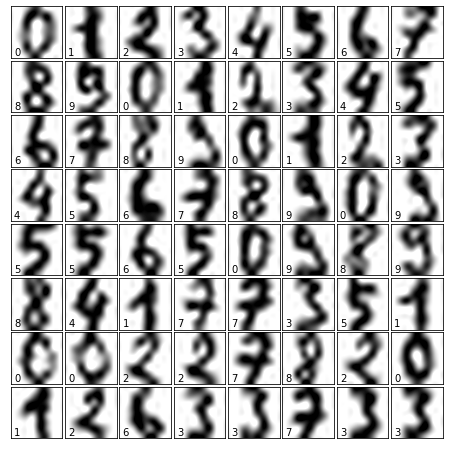

In [3]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(data.images[i], cmap=plt.cm.binary, interpolation='lanczos')
    # label the image with the target value
    ax.text(0, 7, str(data.target[i]))

## 2.Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.data = scaler.fit_transform(data.data)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

Accuracy: 0.9722222222222222
MSE: 0.5222222222222223
MAE: 0.10555555555555556


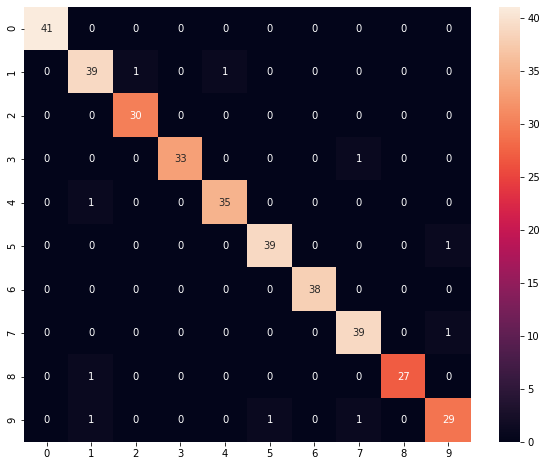

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

## 3.Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.data)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(30)
pca_data = pca.fit_transform(scaled_data)
print("Variance Ratio\n")
print(pca.explained_variance_ratio_)

Variance Ratio

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932002 0.02781805 0.02577055
 0.02275303 0.02227179 0.02165229 0.01914165 0.01775542 0.0163806
 0.01596457 0.0148918  0.01347946 0.01271892 0.01165639 0.01057276
 0.0097516  0.00944418 0.00862166 0.00834356 0.00793345 0.00743832]


## 4.Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.[Hint: Project both the train and test samples to the new subspace]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, data.target, test_size=0.2)

In [13]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [14]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

Accuracy: 0.9277777777777778
MSE: 1.025
MAE: 0.225


### With a high enough number of components(ex. 30), we can achieve 95%+ accuracy on the model, although Logistic Regression was doing an excellent job regarding the unscaled data, reaching 97% and 98% accuracy.

## 5.Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample,plot the digit along with predicted and original label.

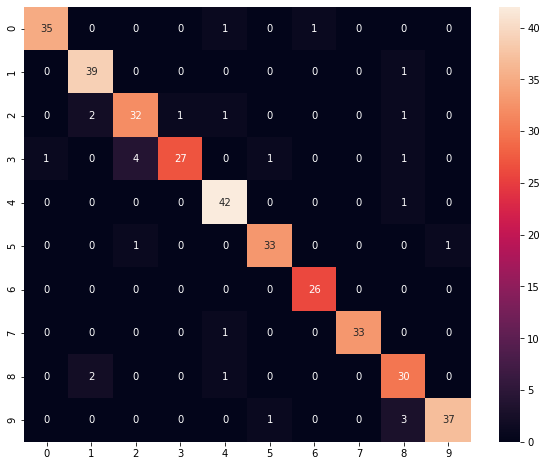

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [16]:
print(f"Classification Report\n{'='*55}\n{classification_report(y_test, y_pred)}{'='*55}")

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.91      0.97      0.94        40
           2       0.86      0.86      0.86        37
           3       0.96      0.79      0.87        34
           4       0.91      0.98      0.94        43
           5       0.94      0.94      0.94        35
           6       0.96      1.00      0.98        26
           7       1.00      0.97      0.99        34
           8       0.81      0.91      0.86        33
           9       0.97      0.90      0.94        41

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360


In [17]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions

,Actual,Predicted
0,1,1
1,6,6
2,9,9
3,0,0
4,8,8
...,...,...
355,5,5
356,5,5
357,0,0
358,6,6


In [18]:
false = predictions[predictions.Actual != predictions.Predicted]
false

,Actual,Predicted
41,3,2
43,2,1
44,1,8
45,2,1
60,4,8
61,3,2
66,9,5
96,9,8
100,3,2
108,3,8
